In [25]:
import fitz  # PyMuPDF

def extract_text_from_pdf(file_path):
    text = ""
    try:
        with fitz.open(file_path) as doc:
            for page in doc:
                text += page.get_text()
        return text
    except Exception as e:
        print(f"Error extracting text from {file_path}: {e}")
        return None


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(processed_tokens)

# Example usage
processed_text = preprocess_text(text)
print(processed_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Microsoft\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Microsoft\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Microsoft\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


unit measurement figure image might showing number thing might whirlpool tank water perhaps collage paint shiny bead done art class without knowing size object unit recognize meter inch difficult know looking fact image show whirlpool galaxy companion galaxy diameter km across credit modification work beckwith stsci hubble heritage team esa nasa chapter outline scope scale physic unit standard unit conversion dimensional analysis estimate fermi calculation significant figure solving problem physic introduction noted figure caption image whirlpool galaxy examine first section chapter galaxy immense atom small yet law physic describe along rest indication underlying unity universe law physic surprisingly implying underlying simplicity nature apparent complexity text learn law physic galaxy atom may seem far removed daily life begin explore subject may soon come chapter unit measurement realize physic play much larger role life first thought matter life goal career choice scope scale phys

In [26]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Generate mock usage data
documents = ['D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter1.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter2.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter3.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter4.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter5.pdf']
usage_data = []

for doc in documents:
    for _ in range(random.randint(5, 20)):
        usage_data.append({
            'document': doc,
            'access_time': datetime.now() - timedelta(days=random.randint(0, 30)),
            'user_id': random.randint(1, 10)
        })

usage_df = pd.DataFrame(usage_data)
usage_df


,document,access_time,user_id
0,D:\Work and Assignments\Python\Python Projects...,2024-07-20 19:00:26.671441,1
1,D:\Work and Assignments\Python\Python Projects...,2024-07-25 19:00:26.671441,5
2,D:\Work and Assignments\Python\Python Projects...,2024-07-24 19:00:26.671441,3
3,D:\Work and Assignments\Python\Python Projects...,2024-07-10 19:00:26.671441,2
4,D:\Work and Assignments\Python\Python Projects...,2024-07-21 19:00:26.671441,8
...,...,...,...
62,D:\Work and Assignments\Python\Python Projects...,2024-07-03 19:00:26.672442,4
63,D:\Work and Assignments\Python\Python Projects...,2024-07-07 19:00:26.672442,9
64,D:\Work and Assignments\Python\Python Projects...,2024-07-26 19:00:26.672442,8
65,D:\Work and Assignments\Python\Python Projects...,2024-07-13 19:00:26.672442,3


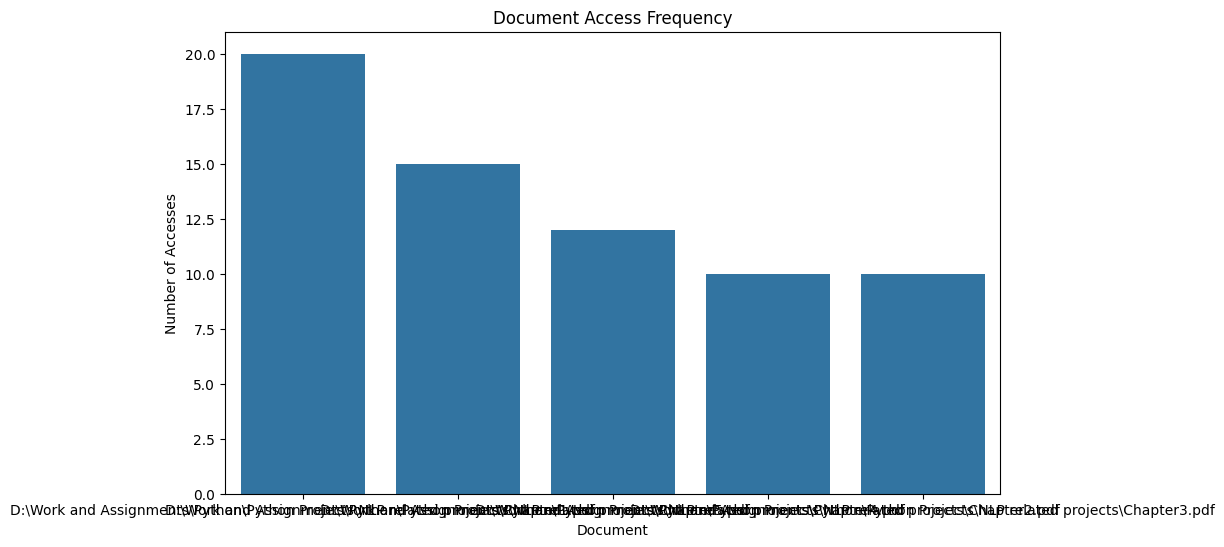

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze document access frequency
access_counts = usage_df['document'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=access_counts.index, y=access_counts.values)
plt.title('Document Access Frequency')
plt.xlabel('Document')
plt.ylabel('Number of Accesses')
plt.show()


In [28]:
from collections import Counter

def analyze_text(documents):
    word_counts = Counter()
    for text in documents:
        processed_text = preprocess_text(text)
        word_counts.update(processed_text.split())
    return word_counts

# Example usage
texts = [extract_text_from_pdf(doc) if doc.endswith('.pdf') else 
         extract_text_from_docx(doc) if doc.endswith('.docx') else 
         extract_text_from_xlsx(doc) for doc in documents if doc]
word_counts = analyze_text(texts)

print("Most common words:", word_counts.most_common(10))


Most common words: [('vector', 1380), ('force', 868), ('velocity', 796), ('acceleration', 682), ('b', 658), ('motion', 564), ('direction', 528), ('equation', 469), ('figure', 457), ('time', 453)]


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_documents(texts):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix

# Example usage
similarity_matrix = find_similar_documents(texts)

print("Document Similarity Matrix:\n", similarity_matrix)


Document Similarity Matrix:
 [[1.         0.8513786  0.88360721 0.89589211 0.89649568]
 [0.8513786  1.         0.84152706 0.89109151 0.85012283]
 [0.88360721 0.84152706 1.         0.95614516 0.88909363]
 [0.89589211 0.89109151 0.95614516 1.         0.90320971]
 [0.89649568 0.85012283 0.88909363 0.90320971 1.        ]]


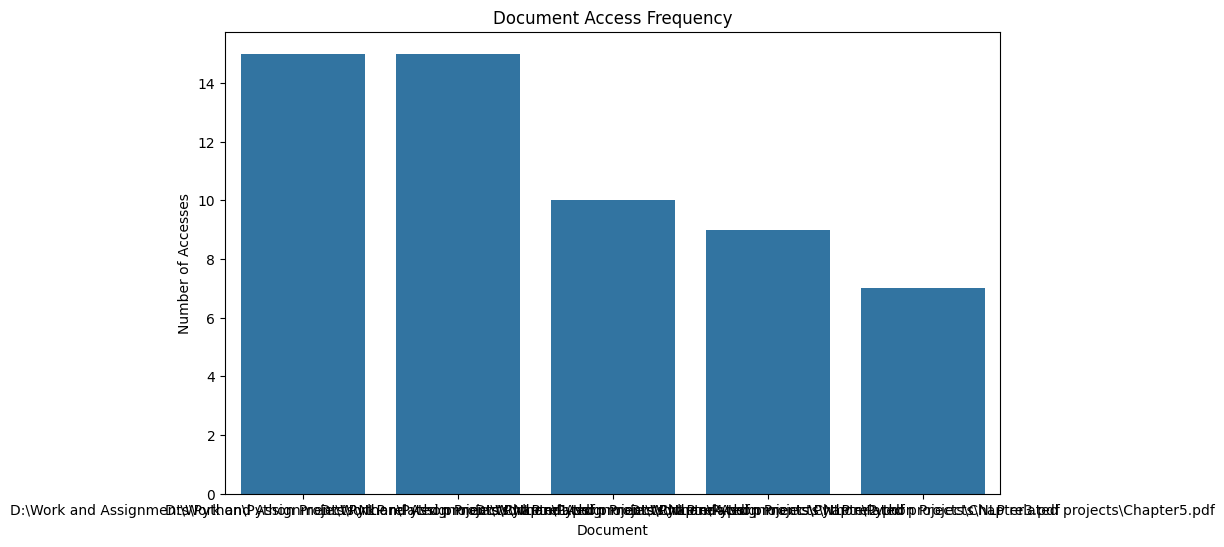

Most common words: [('vector', 1380), ('force', 868), ('velocity', 796), ('acceleration', 682), ('b', 658), ('motion', 564), ('direction', 528), ('equation', 469), ('figure', 457), ('time', 453)]


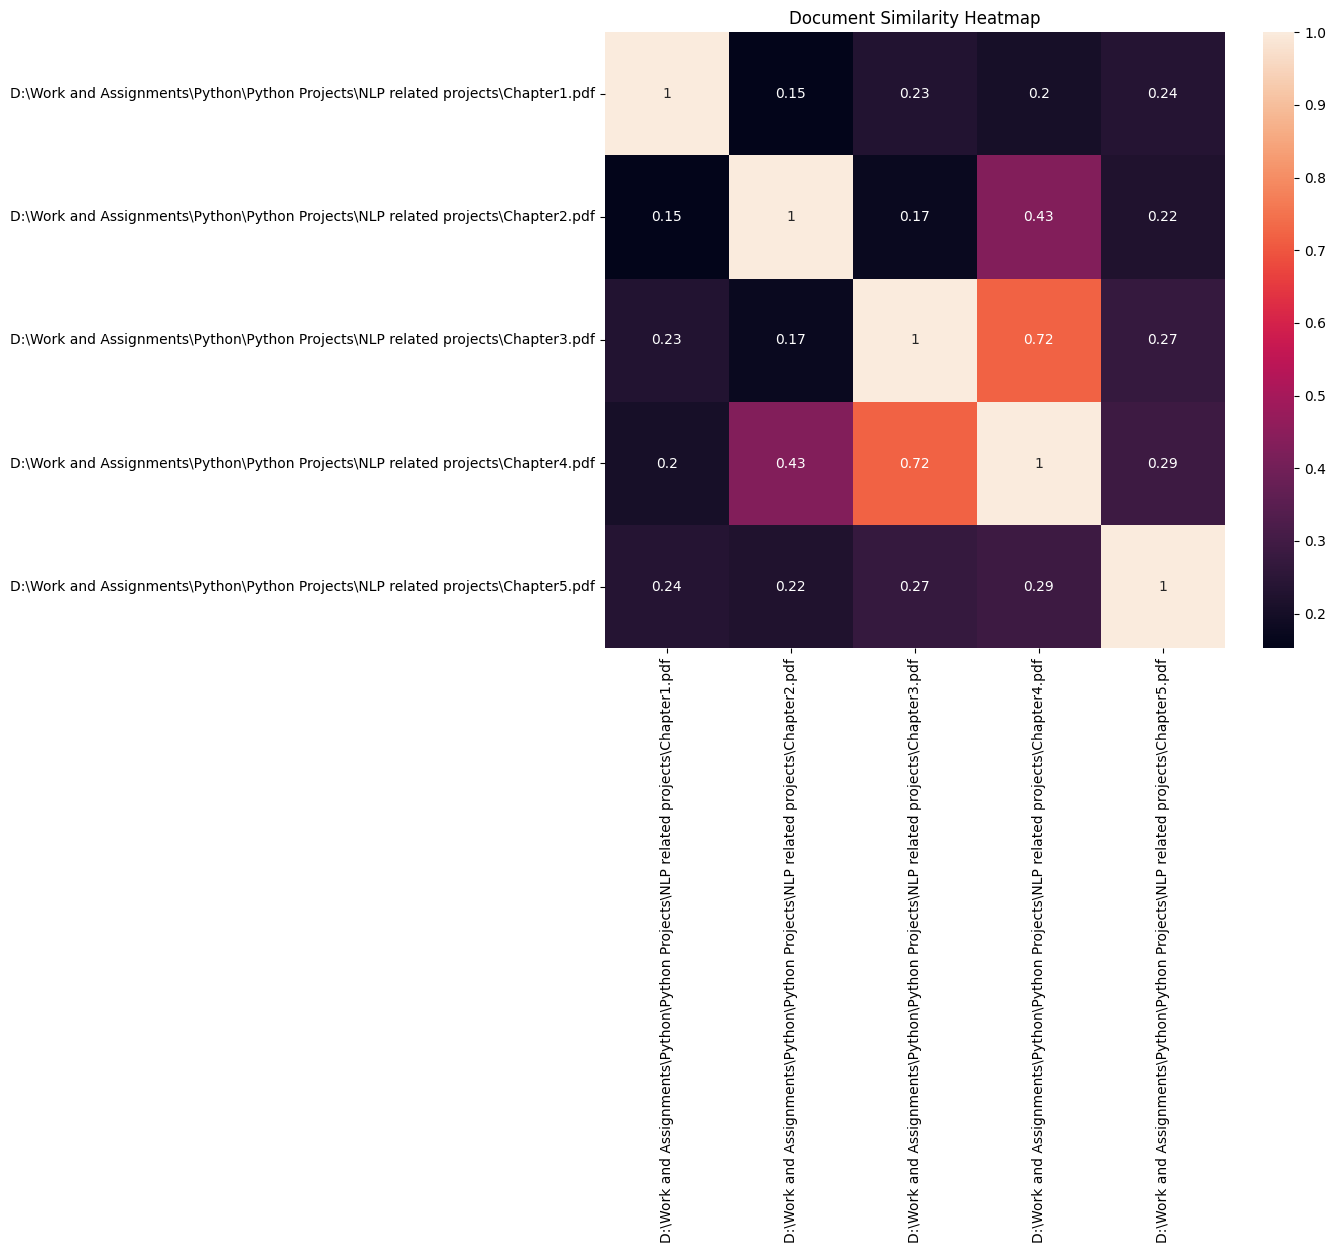

In [31]:
def main():
    # Extract and preprocess text from documents
    documents = ['D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter1.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter2.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter3.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter4.pdf',
             'D:\\Work and Assignments\\Python\\Python Projects\\NLP related projects\\Chapter5.pdf']
    texts = [extract_text_from_pdf(doc) if doc.endswith('.pdf') else 
             extract_text_from_docx(doc) if doc.endswith('.docx') else 
             extract_text_from_xlsx(doc) for doc in documents if doc]
    processed_texts = [preprocess_text(text) for text in texts if text]

    # Analyze usage patterns
    usage_df = generate_mock_usage_data(documents)
    analyze_usage_patterns(usage_df)

    # Analyze text for knowledge gaps
    word_counts = analyze_text(processed_texts)
    print("Most common words:", word_counts.most_common(10))

    # Identify redundancies
    similarity_matrix = find_similar_documents(processed_texts)
    generate_similarity_heatmap(similarity_matrix, documents)

def generate_mock_usage_data(documents):
    # Generate mock usage data
    usage_data = []
    for doc in documents:
        for _ in range(random.randint(5, 20)):
            usage_data.append({
                'document': doc,
                'access_time': datetime.now() - timedelta(days=random.randint(0, 30)),
                'user_id': random.randint(1, 10)
            })
    return pd.DataFrame(usage_data)

def analyze_usage_patterns(usage_df):
    access_counts = usage_df['document'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=access_counts.index, y=access_counts.values)
    plt.title('Document Access Frequency')
    plt.xlabel('Document')
    plt.ylabel('Number of Accesses')
    plt.show()

def generate_similarity_heatmap(similarity_matrix, documents):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, xticklabels=documents, yticklabels=documents)
    plt.title('Document Similarity Heatmap')
    plt.show()

if __name__ == "__main__":
    main()
